In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [11]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Univariate Analysis

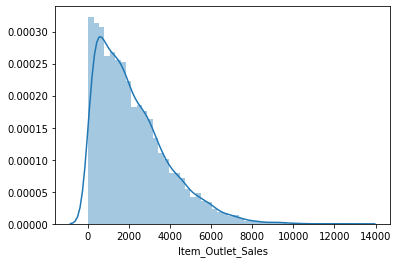

In [15]:
sns.distplot(train['Item_Outlet_Sales'])

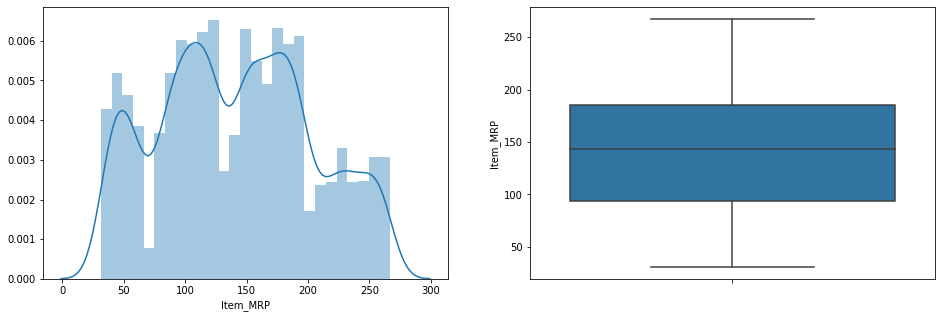

In [16]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(train['Item_MRP'])

plt.subplot(122)
sns.boxplot(y="Item_MRP", data = train)

plt.show()

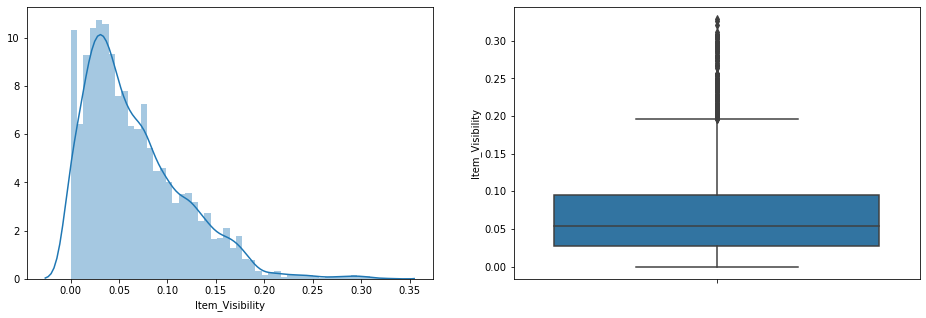

In [17]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(train['Item_Visibility'])

plt.subplot(122)
sns.boxplot(y="Item_Visibility", data = train)

In [18]:
for i in range(0,100,10):
    var = train["Item_Visibility"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.012036432
20 percentile value is 0.022552082999999997
30 percentile value is 0.031946638
40 percentile value is 0.041754584
50 percentile value is 0.05393093400000001
60 percentile value is 0.067953506
70 percentile value is 0.083473583
80 percentile value is 0.106928681
90 percentile value is 0.139521931
100 percentile value is  0.328390948


In [19]:
for i in range(90,100):
    var = train["Item_Visibility"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 0.139521931
91 percentile value is 0.14269958800000002
92 percentile value is 0.147663025
93 percentile value is 0.153456703
94 percentile value is 0.159720671
95 percentile value is 0.16380550900000002
96 percentile value is 0.17133418
97 percentile value is 0.17641157899999999
98 percentile value is 0.187523164
99 percentile value is 0.226284381
100 percentile value is  0.328390948


Item_Visibility plot is skewed. we will transform it later.

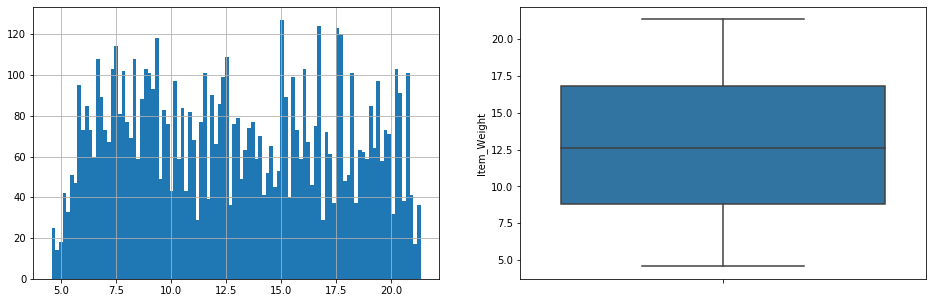

In [20]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
train['Item_Weight'].hist(bins = 100)

plt.subplot(122)
sns.boxplot(y="Item_Weight", data = train)

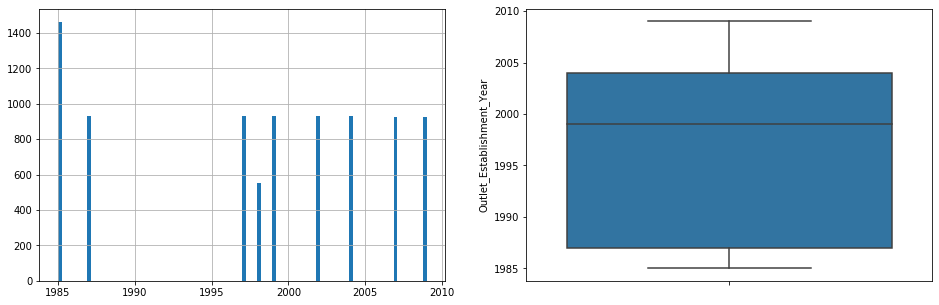

In [21]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
train['Outlet_Establishment_Year'].hist(bins = 100)

plt.subplot(122)
sns.boxplot(y="Outlet_Establishment_Year", data = train)

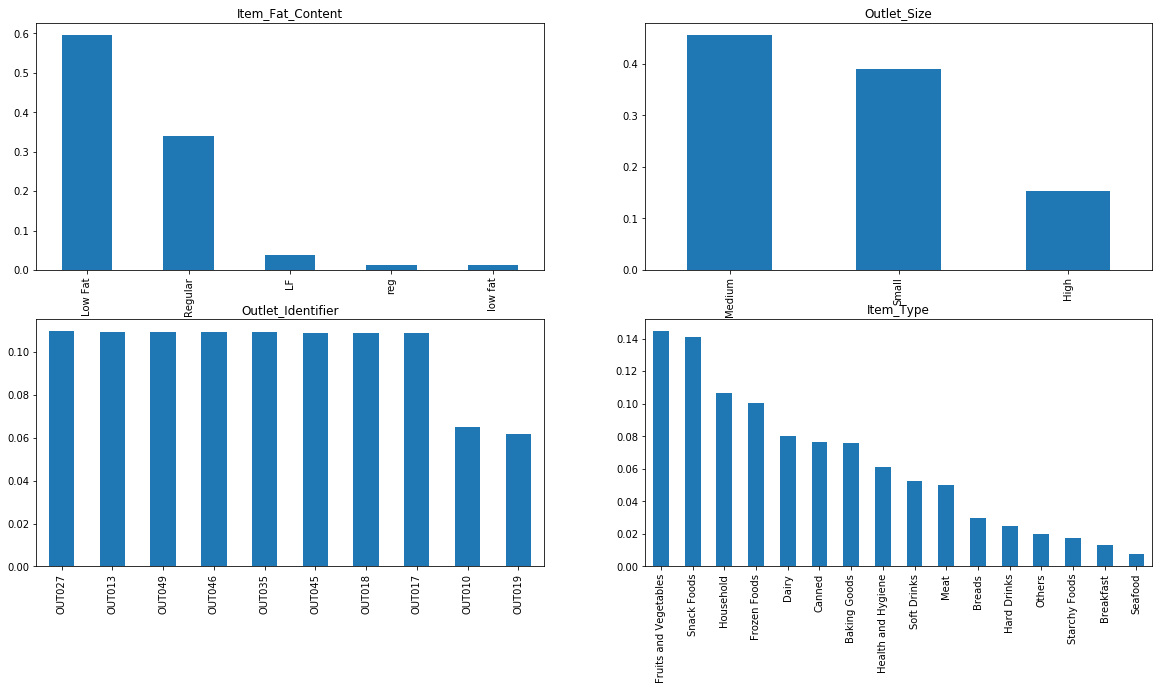

In [22]:
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Item_Fat_Content')

plt.subplot(222)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Outlet_Size')

plt.subplot(223)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Outlet_Identifier')

plt.subplot(224)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Item_Type')

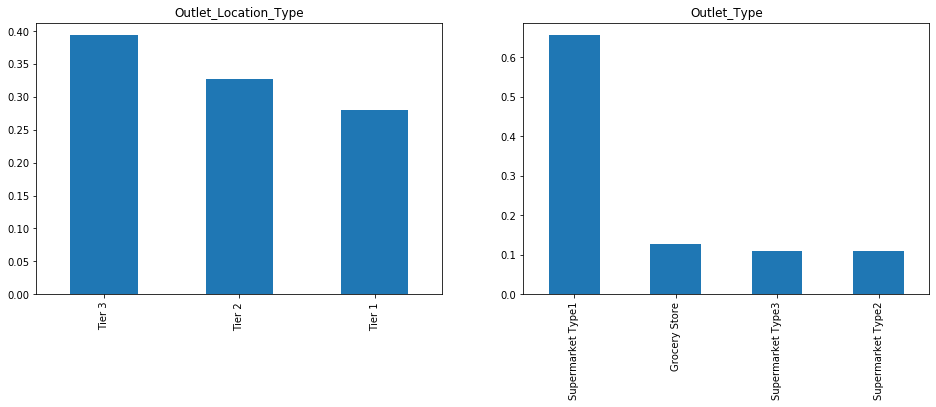

In [23]:
plt.figure(1)
plt.subplot(121)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(16,5), title= 'Outlet_Location_Type')

plt.subplot(122)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(16,5), title= 'Outlet_Type')

# Bivariate analysis 

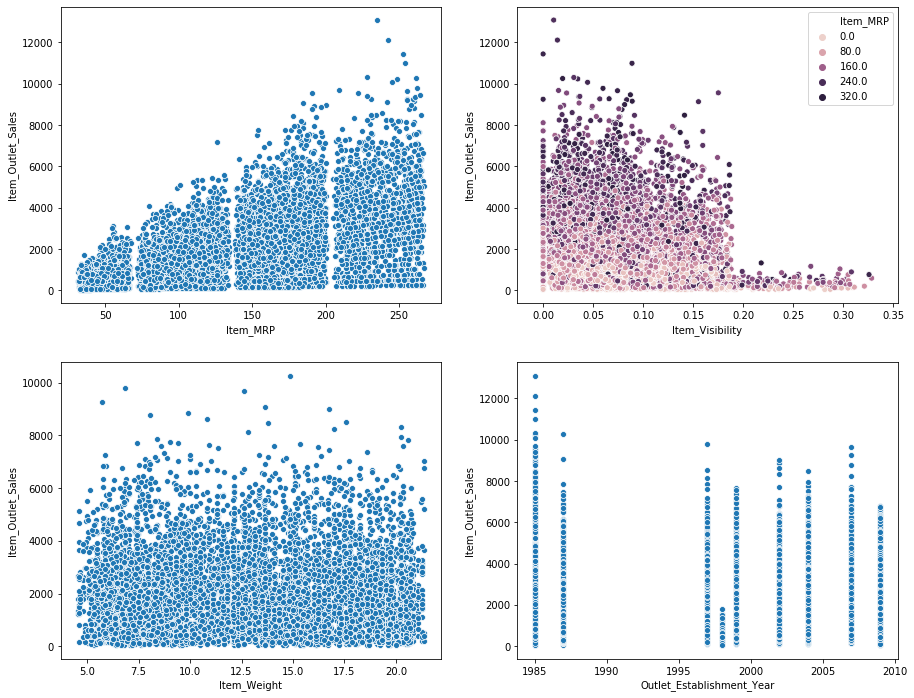

In [24]:
fig, axes = plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train, ax = axes[0, 0])
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_MRP', data = train, ax = axes[0, 1])
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train, ax = axes[1, 0])
sns.scatterplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train, ax = axes[1, 1])

We will make bins for "Item_MRP" as we can see groups in the plot.

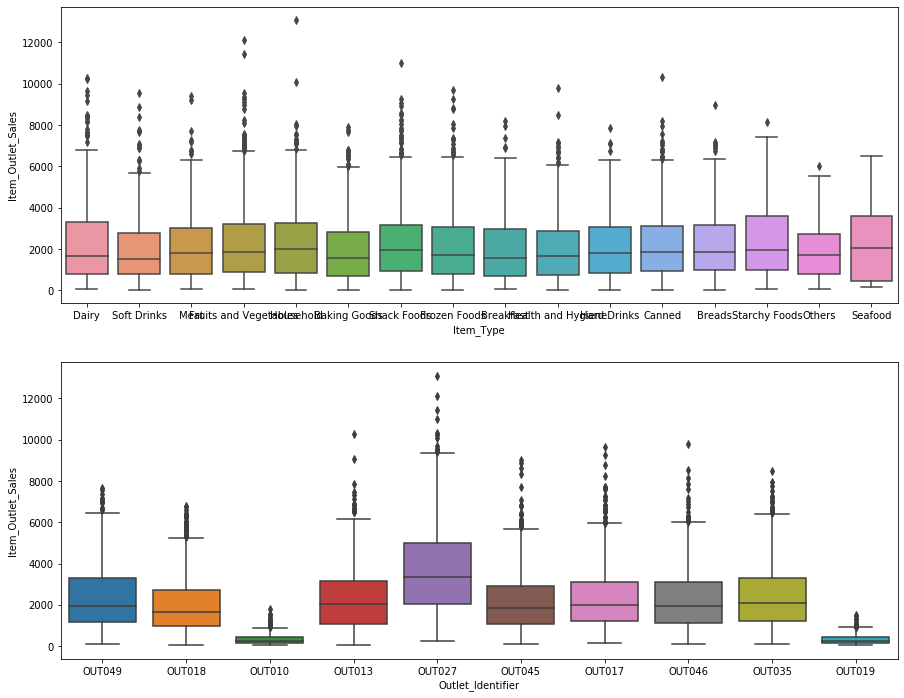

In [25]:
fig,axes=plt.subplots(2,1,figsize=(15,12))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0],data=train)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1],data=train)

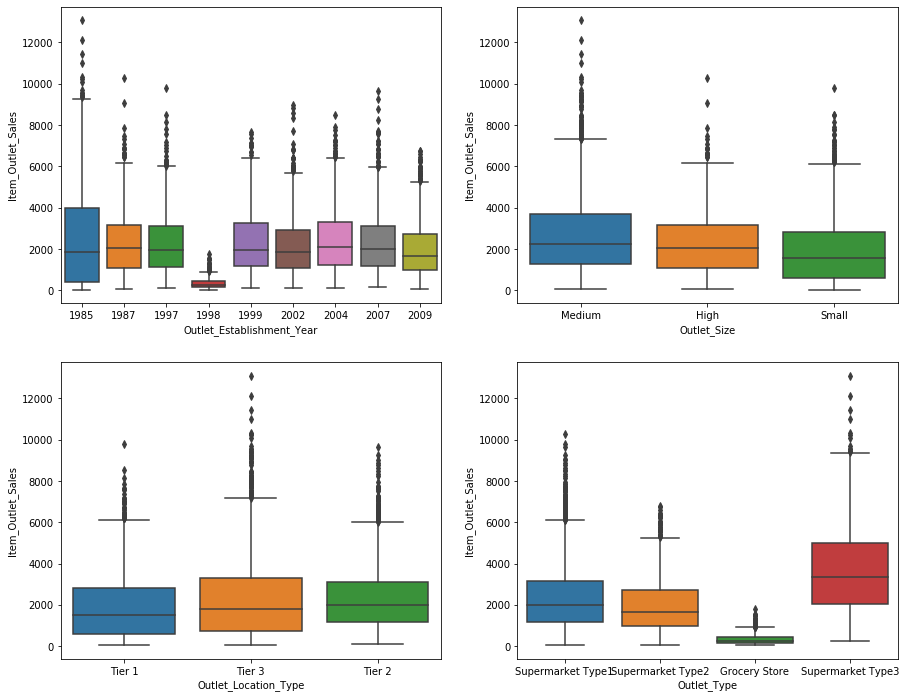

In [26]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train)

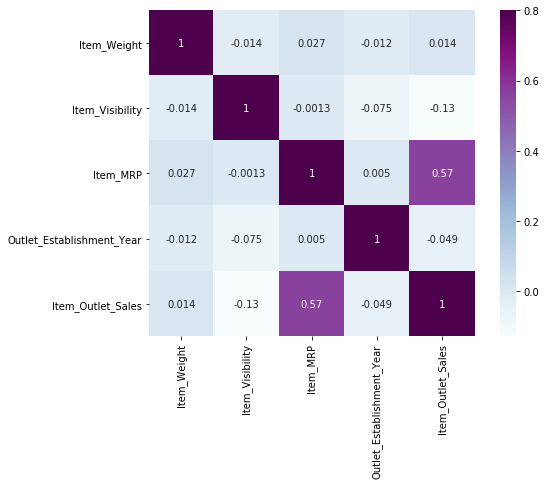

In [27]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, annot = True, square=True, cmap="BuPu");

In [28]:
# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# Outliers and missing value treatment

In [29]:
train.Item_MRP = pd.cut(train.Item_MRP,bins=[25,69,137,203,270],labels=[0,1,2,3],right=True)

In [30]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [31]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we will drop "train.Item_Weight" because as seen from correlation matrix, its very low correlated with the target value.

In [32]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
train.groupby(['Outlet_Size', 'Outlet_Identifier']).size()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT018               928
             OUT027               935
             OUT049               930
Small        OUT019               528
             OUT035               930
             OUT046               930
dtype: int64

In [34]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)

In [35]:
train.Outlet_Size.isna().sum()

0

In [36]:
mn = train[train['Item_Visibility'] != 0]['Item_Visibility'].mean()

In [37]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,mn)

In [38]:
train = train[(train.Item_Visibility >= 0) & (train.Item_Visibility < 0.18)]

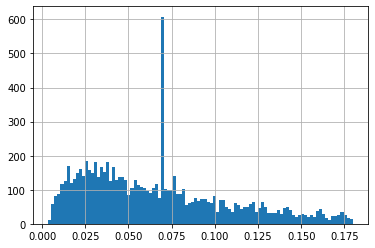

In [39]:
train['Item_Visibility'].hist(bins = 100)

In [40]:
train['Item_Visibility'] = np.log(train['Item_Visibility'])

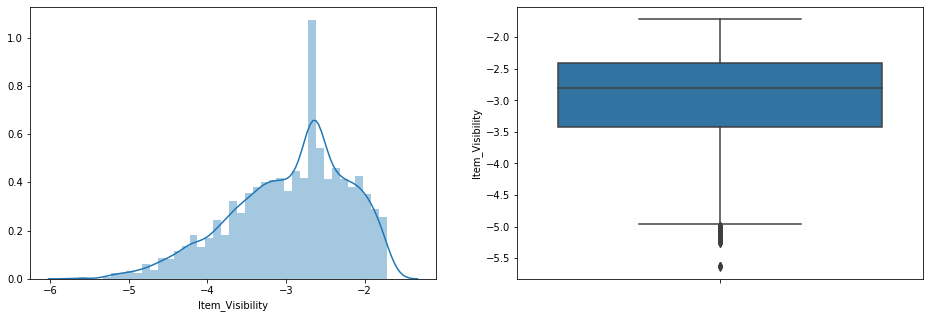

In [41]:
plt.figure(1, figsize=(16,5))
plt.subplot(121)
sns.distplot(train['Item_Visibility'])

plt.subplot(122)
sns.boxplot(y="Item_Visibility", data = train)

In [42]:
for i in range(0,10):
    var = train["Item_Visibility"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -5.633874581928899
1 percentile value is -4.91857438746714
2 percentile value is -4.66390032846428
3 percentile value is -4.532341281492756
4 percentile value is -4.414776298303264
5 percentile value is -4.327558373830726
6 percentile value is -4.247403018742456
7 percentile value is -4.188920111933203
8 percentile value is -4.134600654395298
9 percentile value is -4.067684150433793
100 percentile value is  -1.715871442454878


In [43]:
train = train[train.Item_Visibility > -4.0]

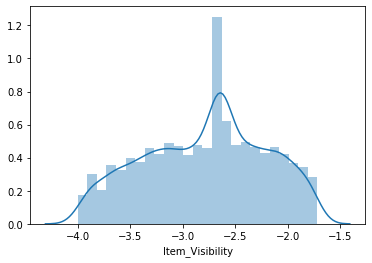

In [44]:
sns.distplot(train['Item_Visibility'])

In [45]:
# train = train[train.Item_Outlet_Sales < 10000]

In [46]:
# train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Outlet_Type']= le.fit_transform(train['Outlet_Type'])
train['Item_MRP']= le.fit_transform(train['Item_MRP'])

In [49]:
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier']])
train = train.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Item_Weight'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [50]:
X = train.drop(['Item_Outlet_Sales'],axis = 1)
y = train['Item_Outlet_Sales']

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [52]:
train.shape , test.shape

((7476, 1512), (5681, 11))

In [53]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [54]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred = model.predict(X_valid)

In [56]:
model.score(X_train,y_train), model.score(X_valid,y_valid)

(0.6473546388781998, 0.656301107736155)

In [57]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))

997.3769139372366


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X,y)
predictr = rf.predict(X_valid)
rf.score(X_valid,y_valid)
# mse=mean_squared_error(y,predictr)
# rf_score=np.sqrt(mse)
# rf_score

0.9213792705733319

In [59]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))

997.3769139372366


In [60]:
residual = y_valid-y_pred

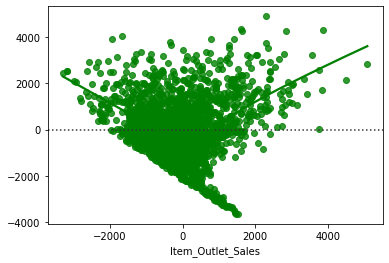

In [61]:
sns.residplot(residual, y_pred, lowess=True, color="g")

In [62]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats

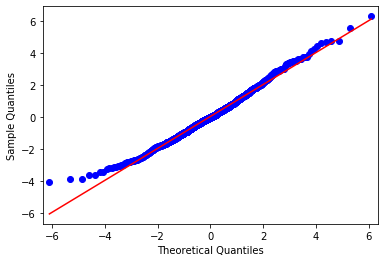

In [63]:
sm.qqplot(residual, stats.t, line='r', fit=True )
pylab.show()

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X,y)
predict_r=dtr.predict(X_valid)
rf.score(X_valid,y_valid)
# mse=mean_squared_error(test_label,predict_r)
# dtr_score=np.sqrt(mse)
# dtr_score

0.9213792705733319

In [65]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))

997.3769139372366
